# WiFi_MaP

## A look to the data

Let's get some generic data from the collected APs during the walk from the CSV file stored on FlipperZero side.

The CSV file looks like (with semicolon as separator):

|AP hash|Distance (meters)|AP auth mode|Time from start (seconds)|
|--|--|--|--|
|163976e1|61.90|4|68|
|f8fe611|74.99|3|68|
|134a1d9f|74.99|3|68|
|f81b53a0|82.54|3|68|
|287de1e8|100.00|3|68|
|9669d9a2|100.00|3|68|


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

# Get a Data Frame from csv file
df = pd.read_csv("./../local-data/wifi_map_14-10-2025_9_15_51_home_yoga_terra.csv", sep=";")

### Some stats

In [76]:
# number of data collected (rows)
record_num = len(df)
md("number of records collected: **%i** rows" % (record_num))

number of records collected: **3388** rows

In [78]:
# unique AP during warWalk
uniq_aps_num = df["AP hash"].unique().size
md("Number of unique APs found during the walk: **%i**" % (uniq_aps_num))

Number of unique APs found during the walk: **482**

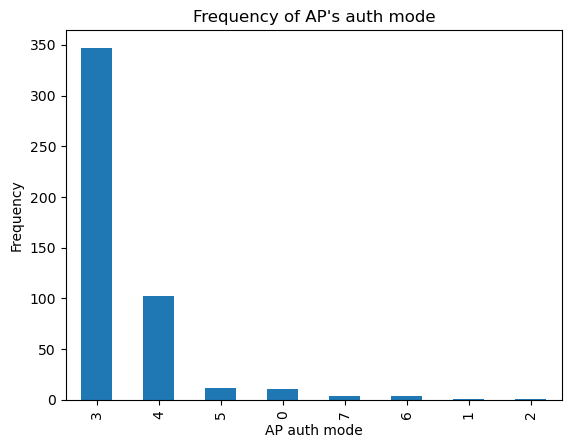

In [68]:
# APs and type of auth mode
aps_uniq = df.drop_duplicates(subset="AP hash")
auth_modes = aps_uniq["AP auth mode"].value_counts()
auth_modes.plot(
    kind="bar",
    xlabel="AP auth mode",
    ylabel="Frequency",
    title="Frequency of AP's auth mode",
)
plt.show()

Table of ESP32 AP WIFI Auth Mode with 8 first values, for more values check [wifi_auth_mode_t](https://github.com/espressif/esp-idf/blob/master/components/esp_wifi/include/esp_wifi_types_generic.h#L85)

| Open | WEP | WPA_PSK | WPA2_PSK | WPA_WPA2_PSK | ENTERPRISE/WPA2 | WPA3_PSK |
|------|-----|---------|----------|--------------|-----------------|----------|
|  0   |  1  |    2    |    3     |      4       |     5/6         |     7    |

In [79]:
# number of APs with open auth
open_aps = len(aps_uniq.loc[aps_uniq["AP auth mode"] == 0])
md("Amount of APs with open auth: **%i**" % (open_aps))

Amount of APs with open auth: **11**

In [80]:
# total time walked
total_time = int(df.tail(1).iloc[0, 3])
md("Total time walked **%i** seconds" % (total_time))

Total time walked **705** seconds